<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Texas law enforcement population
---

## Overview

A high-level look at the population of sworn officers in Texas law enforcement.

## Summary of findings
* There are about 75,000 sworn police officers in Texas.
* About 60% are white, 30% hispanic, 10% black.
* About 90% are men.
* While women are only 10% of officers at large, they comprise ~15% of younger officers, ~20% of black officers, and ~15% of hispanic officers.
* High-population counties have disproportionately many minority officers (especially black -- but also hispanic, female, and other non-white races).

## Datasets used:
* `tji/auxiliary-datasets/list_of_texas_officers`
* `tji/auxiliary-datasets/census_data_by_county`

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## [ Setup and load data ]

In [1]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

import datetime as dt
import os
import random

import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Jupyter setup
%matplotlib inline

# Watermark extension to print version/system information
# Flags:
# -a [author] -d (date) -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version) -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -g -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

####################################################
# END Boilerplate
####################################################

Everett Wetchler 2018-05-27 18:29:34 CDT

numpy 1.14.3
pandas 0.23.0
matplotlib 2.2.0
seaborn 0.8.1
datadotworld 1.6.0
Git hash: 39e6616d42fa05cfca96a73d959a3de90a92317f
watermark 1.5.0


Removing 8 past plots


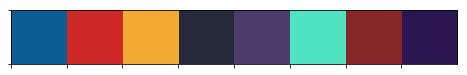

In [2]:
from lib.utils import *
from lib.style import *

plotsaver = PlotSaver('../plots/', 'officer_population_')
sns.palplot(sns.color_palette())

In [3]:
def long_gender(g):
    if pd.isnull(g):
        return g
    return 'MALE' if g == 'M' else 'FEMALE'

### Load and merge data

In [4]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
officer_info = dataset.dataframes['list_of_texas_officers']
officer_info['gender'] = officer_info['gender'].apply(long_gender)
officer_info['highest_cert_abbr'] = officer_info['highest_cert'].apply(lambda cert: cert.split(' PEACE OFFICER')[0])
officer_info['service_years_int_capped'] = officer_info.service_time.astype(int).apply(lambda y: min(y, 50))

In [5]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
census = dataset.dataframes['census_data_by_county']
county_populations = census[census['metric_description'] == 'Population estimates, July 1, 2016,  (V2016)'].iloc[0]
county_populations.drop([c for c in county_populations.index if c.startswith('metric')], inplace=True)
county_populations = dict((c.upper(), count) for c, count in county_populations.astype(int).items())

def pop_category(p):
    if pd.isnull(p):
        return p
    elif p < 1e4:
        return 'XSMALL\n(< 10k)'
    elif p < 1e5:
        return 'SMALL\n(< 100k)'
    elif p < 1e6:
        return 'MEDIUM\n(100k-1MM)'
    else:
        return 'LARGE\n(1MM+)'

officer_info['county_size'] = officer_info.current_agency_county.apply(
    lambda c: pop_category(county_populations.get(c, None)))

officer_info.sample(10)

,name_full,name_first,name_middle,name_last,name_suffix,gender,race,age_range,current_agency,current_agency_county,highest_cert,highest_cert_int,service_time,highest_cert_abbr,service_years_int_capped,county_size
31091,FLOYD M DAVIS,FLOYD,M,DAVIS,NaN,MALE,BLACK,51+,HARRIS CO CONST PCT 7,HARRIS,ADVANCED PEACE OFFICER,3,9.50,ADVANCED,9,LARGE\n(1MM+)
39604,TERRICK MIDDLETON,TERRICK,NaN,MIDDLETON,NaN,MALE,BLACK,51+,KATY ISD POLICE DEPT,HARRIS,BASIC PEACE OFFICER,1,6.58,BASIC,6,LARGE\n(1MM+)
21986,WILLIAM M GRAY,WILLIAM,M,GRAY,NaN,MALE,WHITE,41-50,ECTOR CO SHERIFFS OFFICE,ECTOR,ADVANCED PEACE OFFICER,3,13.00,ADVANCED,13,MEDIUM\n(100k-1MM)
51808,LUIS E CASTELLANOS,LUIS,E,CASTELLANOS,NaN,MALE,HISPANIC,21-30,PATTON VILLAGE POLICE DEPT,MONTGOMERY,BASIC PEACE OFFICER,1,5.34,BASIC,5,MEDIUM\n(100k-1MM)
71143,TROY E OFFICER,TROY,E,OFFICER,NaN,MALE,BLACK,51+,AUSTIN POLICE DEPT,TRAVIS,MASTER PEACE OFFICER,4,26.58,MASTER,26,LARGE\n(1MM+)
56816,ARTURO D IBARRA JR,ARTURO,D,IBARRA,JR,MALE,HISPANIC,31-40,STARR CO DIST ATTY OFFICE,STARR,ADVANCED PEACE OFFICER,3,11.33,ADVANCED,11,SMALL\n(< 100k)
39695,RAJIV J BHATT,RAJIV,J,BHATT,NaN,MALE,OTHER,31-40,KLEIN ISD POLICE DEPT,HARRIS,INTERMEDIATE PEACE OFFICER,2,4.83,INTERMEDIATE,4,LARGE\n(1MM+)
22334,CAROLINA PEREZ,CAROLINA,NaN,PEREZ,NaN,FEMALE,HISPANIC,31-40,EL PASO CO SHERIFFS OFFICE,EL PASO,INTERMEDIATE PEACE OFFICER,2,4.08,INTERMEDIATE,4,None
63410,CHRISTOPHER L GRIFFIN,CHRISTOPHER,L,GRIFFIN,NaN,MALE,BLACK,21-30,TEXAS DEPT OF PUBLIC SAFETY,TEXAS,NONE,0,0.42,NONE,0,None
10494,ALLEN D RICHARDSON,ALLEN,D,RICHARDSON,NaN,MALE,BLACK,41-50,CUNEY POLICE DEPT,CHEROKEE,BASIC PEACE OFFICER,1,5.16,BASIC,5,SMALL\n(< 100k)


## [ Begin analysis ]

In [6]:
plot_order = ['age_range', 'race', 'gender', 'service_years_int_capped', 'county_size', 'highest_cert_abbr']
col_colors = {
    'gender': [TJI_RED, TJI_BLUE],
    'race': [TJI_DARKGRAY, TJI_RED, TJI_BLUE, TJI_YELLOW],
    'age_range': sns.color_palette('Blues_d', 4)[::-1],
    'county_size': sns.color_palette('Greens_d', 4)[::-1],
    'service_years_int_capped': [TJI_BLUE],
    'highest_cert_abbr': sns.color_palette()[:-1],
}
order = {
    'gender': ['FEMALE', 'MALE'],
    'race': ['WHITE', 'HISPANIC', 'BLACK', 'OTHER'],
    'age_range': ['21-30', '31-40', '41-50', '51+'],
    'county_size': ['XSMALL\n(< 10k)', 'SMALL\n(< 100k)', 'MEDIUM\n(100k-1MM)', 'LARGE\n(1MM+)'],
    'highest_cert_abbr': ['NONE', 'BASIC', 'INTERMEDIATE', 'ADVANCED', 'MASTER'],
}
col_printname = {
    'gender': 'Gender',
    'race': 'Race',
    'age_range': 'Age',
    'county_size': 'County Size',
    'service_years_int_capped': 'Service Time (years)',
    'highest_cert_abbr': 'Certification Level',
}
nostack = {'service_years_int_capped', 'highest_cert_abbr'}

def make_grid_plot(stack_col=None, alpha=0.8): 
    nrows = 3#2 if stack_col else 3
    fig, axes = plt.subplots(nrows, 2)
    axes = axes.flatten()

    fig.set_size_inches(18, 6 * nrows)
    if not stack_col:
        fig.suptitle("OVERVIEW - %s Texas police officers, as of May 2018" % "{:,}".format(len(officer_info)), fontsize=24)
    else:
        fig.suptitle("CROSSTAB - Texas officer demographics by " + col_printname[stack_col], fontsize=24)

    iax = 0
    for by_col in plot_order:
        if by_col == stack_col:
            continue
        ax = axes[iax]
        iax += 1
        if stack_col:
            vc = officer_info.groupby([by_col, stack_col]).size().unstack()
            vc = vc.div(vc.sum(axis=1), axis=0)
            vc = vc[order[stack_col]]
            color = col_colors[stack_col]
        else:
            vc = officer_info[by_col].value_counts(True)
            color = col_colors[by_col][::-1]

        if by_col == 'service_years_int_capped':
            vc = vc.sort_index()
            vc.plot(kind='bar', ax=ax, width=1, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_ylim(0, 1.01)
                ax.set_yticks(np.arange(0, 1.01, .1))
            ax.set_xticklabels([(t.get_text() if int(t.get_text()) % 5 == 0 else '')
                                for t in ax.get_xticklabels()], rotation=0)
            ax.set_ylabel("Fraction of officers")
            ax.set_xlabel(col_printname[by_col])
            percentify_y(ax, decimals=0)
        else:
            vc = vc.loc[order[by_col]][::-1]
            vc.plot(kind='barh', ax=ax, width=.9, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_xlim(0, 1.01)
                ax.set_xticks(np.arange(0, 1.01, .1))
            ax.set_xlabel("Fraction of officers")
            ax.set_ylabel(col_printname[by_col])
            percentify_x(ax, decimals=0)

        if stack_col:
            ax.set_title("%s distribution by %s" % (col_printname[stack_col], col_printname[by_col]))
            ax.legend()
        else:
            ax.set_title("By %s" % (col_printname[by_col]))
        plt.subplots_adjust(hspace=0.4, wspace=0.4, left=0.16)

    plotsaver.saveplot(fig, (stack_col or 'overview') + '_grid')

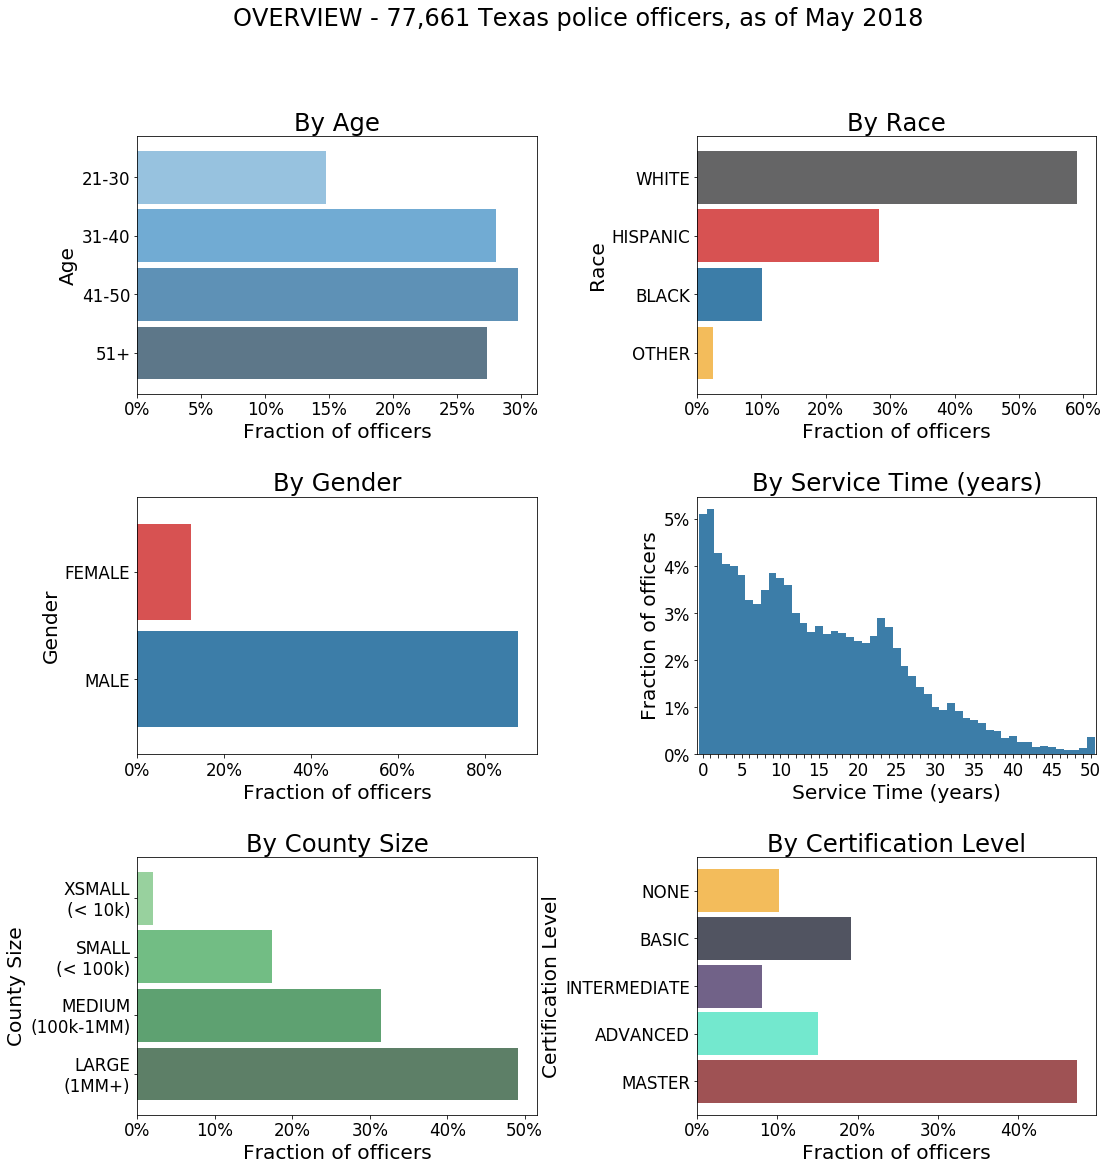

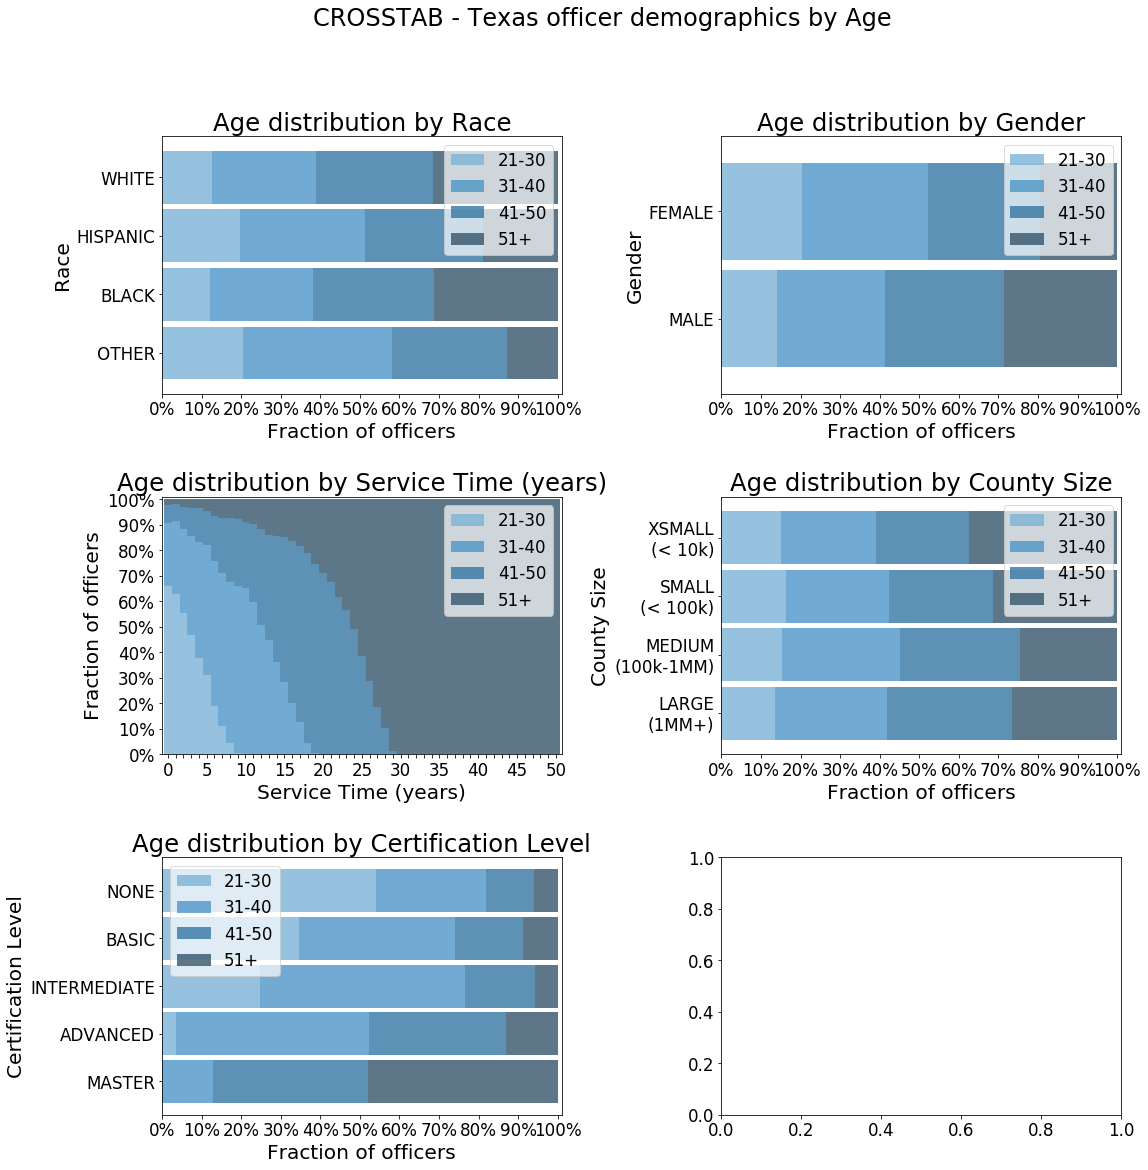

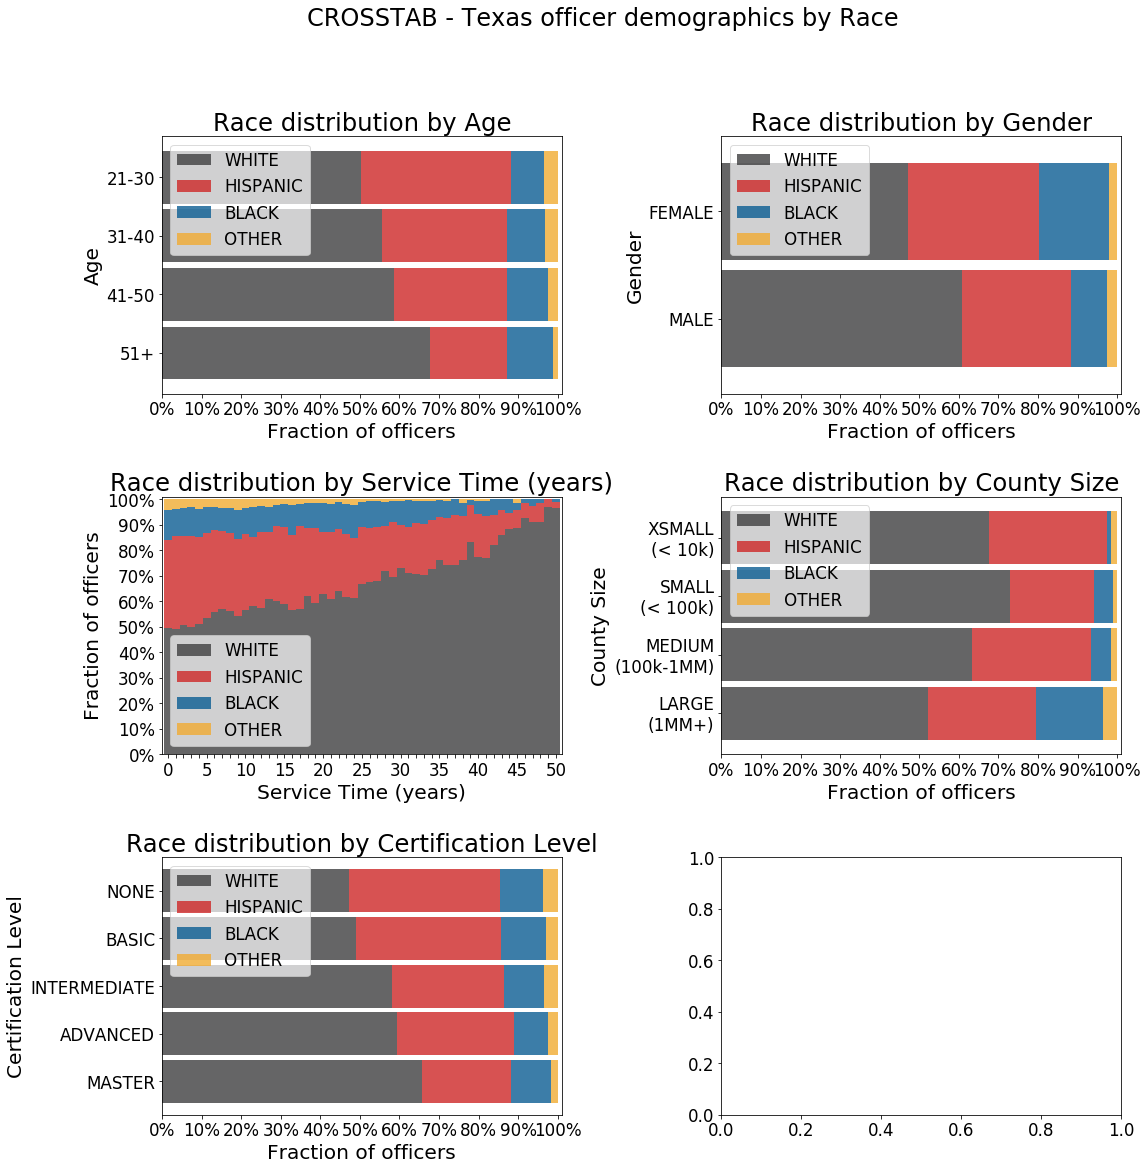

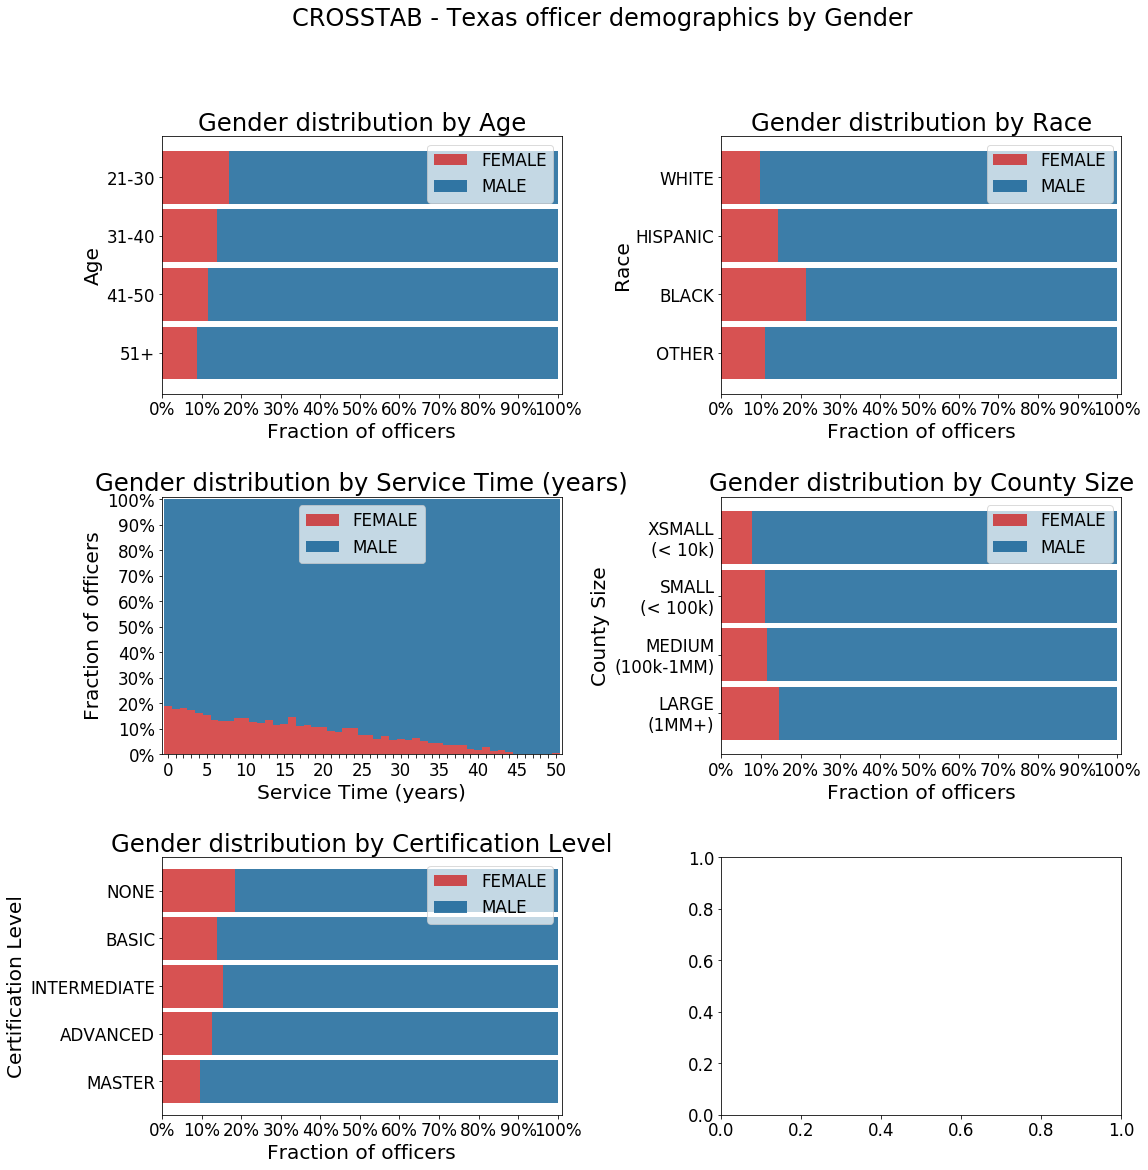

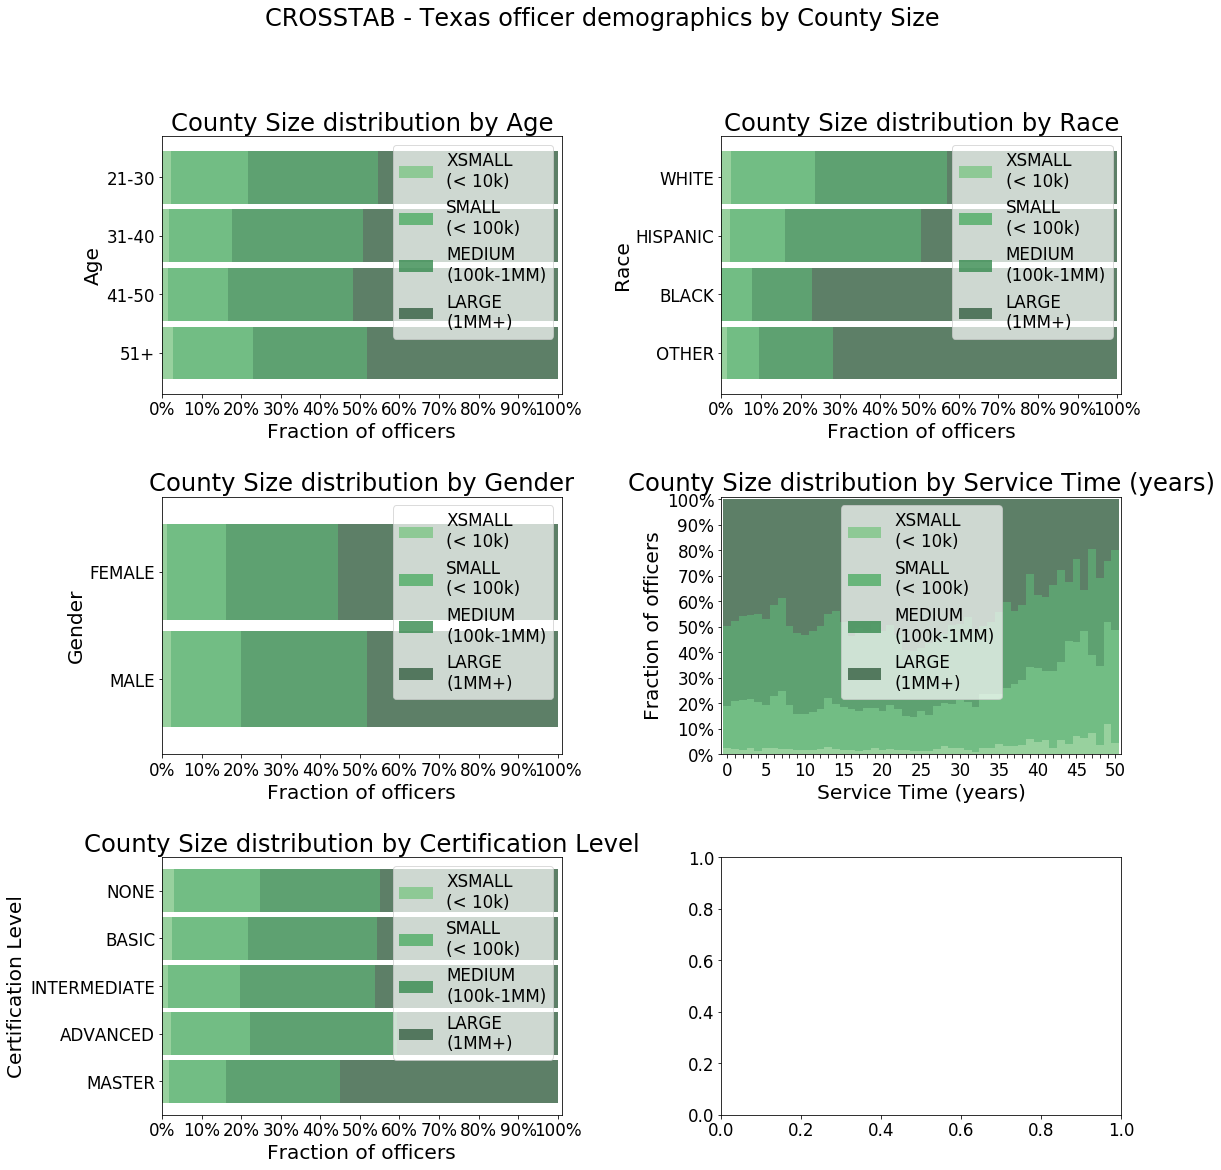

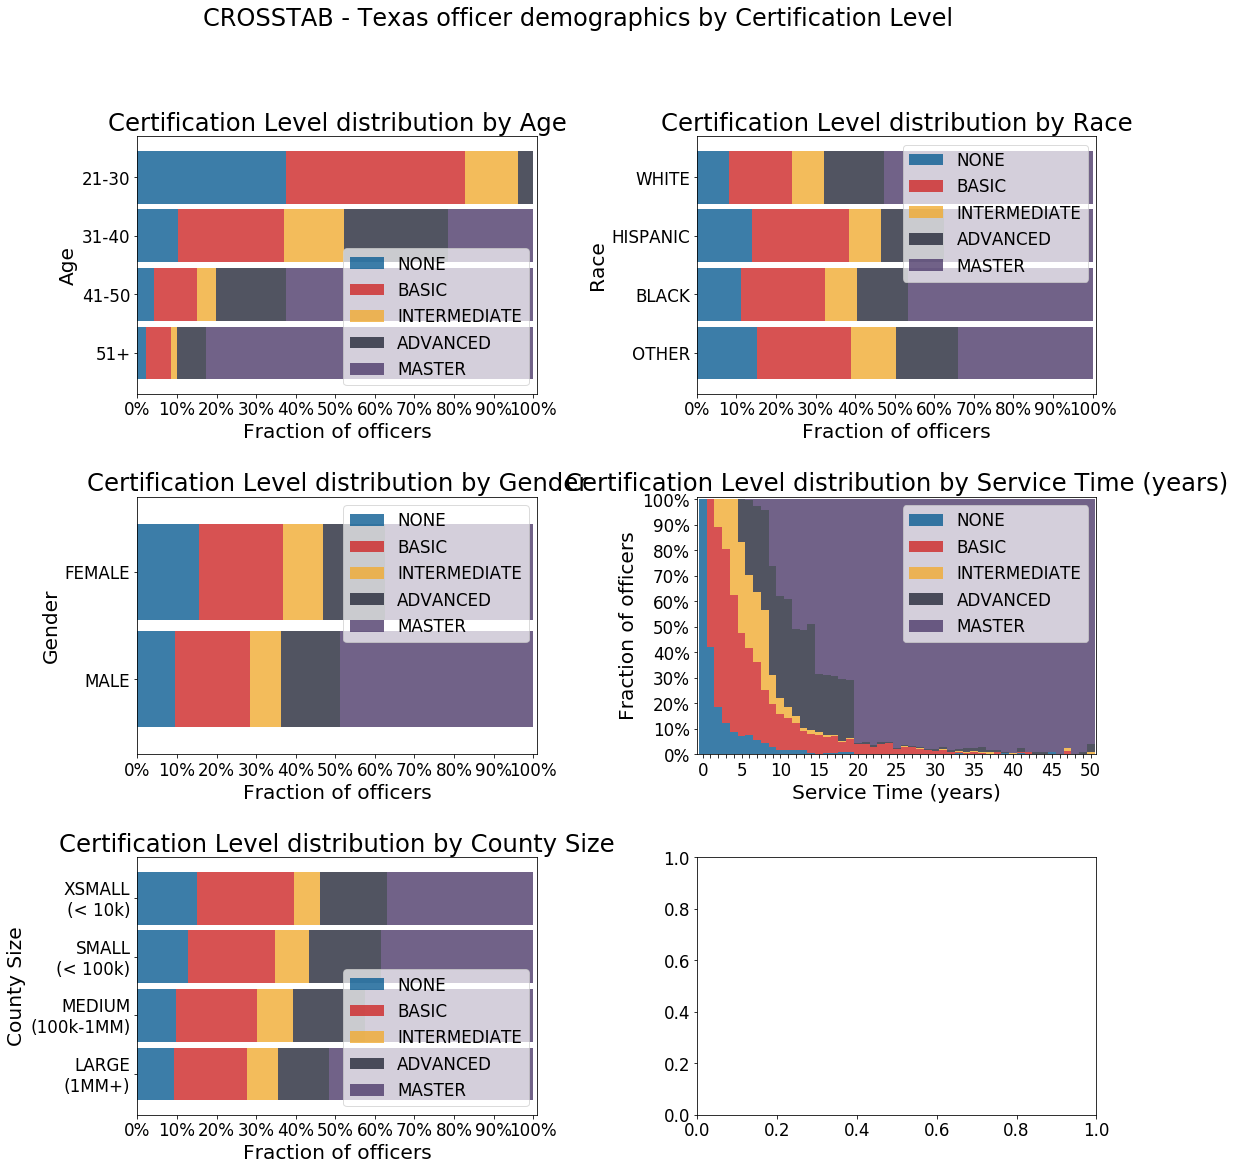

In [7]:
for by in [None] + plot_order:
    if by == 'service_years_int_capped':
        continue
    make_grid_plot(by)

## [ Another look at gender ]

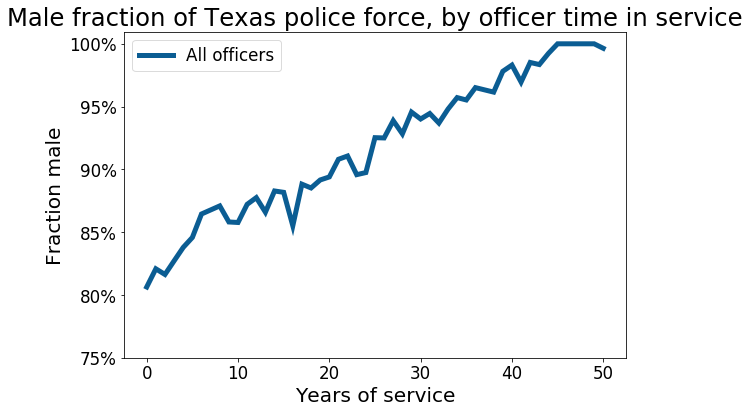

In [8]:
officer_info['is_male'] = officer_info.gender == 'MALE'
fig, ax = plt.subplots(1)
officer_info.groupby('service_years_int_capped')['is_male'].mean().plot(label='All officers')
ax.set_title('Male fraction of Texas police force, by officer time in service')
ax.set_xlabel('Years of service')
ax.set_ylabel('Fraction male')
ax.set_yticks(np.arange(.75, 1.01, .05))
percentify_y(ax, decimals=0)
ax.legend()
plotsaver.saveplot(fig, 'male_fraction_by_service_years')

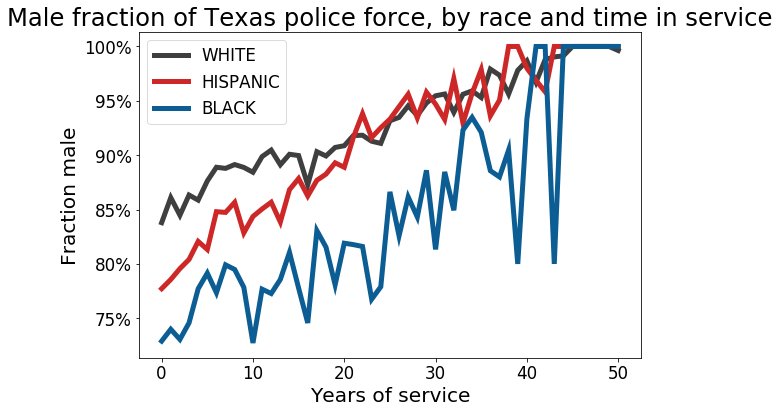

In [9]:
fig, ax = plt.subplots(1)
for race, color in zip(order['race'], col_colors['race']):
    if race == 'OTHER':
        continue
    frame = officer_info[officer_info.race == race]
    s = frame.groupby('service_years_int_capped')['is_male'].mean().sort_index()
    s.plot(kind='line', label=race, color=color)

percentify_y(ax, decimals=0)
ax.legend()
ax.set_title('Male fraction of Texas police force, by race and time in service')
ax.set_xlabel('Years of service')
ax.set_ylabel('Fraction male')
plotsaver.saveplot(fig, 'male_fraction_by_race_and_service_years')